In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")


In [28]:
print(df.shape)

(2772, 5)


In [29]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [30]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [31]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

# Q1. 
**시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.**

- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

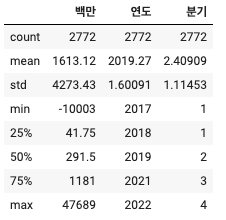

In [32]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


우선 시점 컬럼에서 연도와 분기를 분리하자

In [33]:
# 강의 자료와는 다르게 연도와 분기의 구분자가 '.'이므로 split() 메서드에 파라미터를 추가한다.
df["연도"] = df["시점"].map(lambda x : x.split('.')[0])
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018


In [34]:
# 연도 컬럼의 데이터 타입을 확인하자
df.dtypes

국가(대륙)별    object
상품군별       object
판매유형별      object
시점         object
데이터         int64
연도         object
dtype: object

In [35]:
# astype() 메서드를 이용하여 int 타입으로 바꾸자
df = df.astype({'연도':'int'})
df.dtypes

국가(대륙)별    object
상품군별       object
판매유형별      object
시점         object
데이터         int64
연도          int32
dtype: object

In [36]:
# split() 메서드를 활용하여 분기 컬럼을 만드려고 하는데 '시점' 컬럼 구분자가 '.', '/' 두 개이다.
# replace() 메서드로 .으로 통합한 후 split 하자.

df["시점2"] = df["시점"].str.replace("/", ".")  
df.head()
# replace() 만 쓰면 안되고 앞에 str을 붙여줘야 한다!!!

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,시점2
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,2017.1.4
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2017.2.4
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,2017.3.4
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,2017.4.4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,2018.1.4


상황에 따라 사용해야 할 함수가 다르다

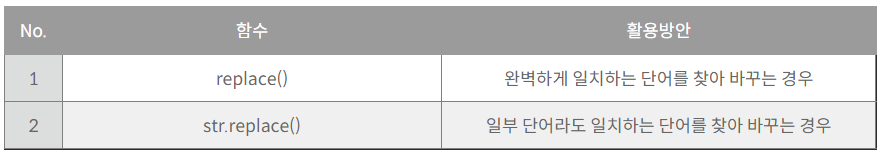

In [37]:
df["분기"] = df["시점2"].map(lambda x : int(x.split('.')[1]))
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,시점2,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,2017.1.4,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2017.2.4,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,2017.3.4,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,2017.4.4,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,2018.1.4,1
...,...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2021.2.4,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,2021.3.4,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,2021.4.4,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,2022.1.4,1


In [38]:
# 임시 컬럼은 삭제하자
df = df.drop(["시점2"], axis=1)
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


'데이터' 컬럼을 '백만'으로 변경하자

In [39]:
df.rename(columns={'데이터':'백만'}, inplace=True)
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


기술통계값을 구하자

In [40]:
df.describe().round()

,백만,연도,분기
count,2772.0,2772.0,2772.0
mean,1613.0,2019.0,2.0
std,4273.0,2.0,1.0
min,-10003.0,2017.0,1.0
25%,42.0,2018.0,1.0
50%,292.0,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


scatterplot과 함께 더 직관적으로 비교하자

<AxesSubplot:xlabel='연도', ylabel='백만'>

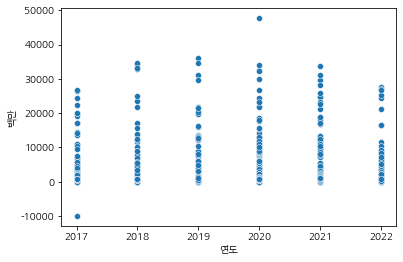

In [41]:
sns.scatterplot(data=df, x='연도', y='백만', ci=None)

'백만' 컬럼에 마이너스 값이 왜 있는지 확인해보자

In [42]:
df[df["백만"] < 0]

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
1102,아세안(ASEAN),화장품,면세점 이외,2017.3/4,-10003,2017,3


음수인 값은 하나의 데이터만 존재한다.  
해당 데이터 사이트에서 전체 데이터를 검색해 봐도 음수값을 가진 데이터는 나오지 않는다.
2772개의 데이터 중 음수인 데이터가 단 하나라는 것을 보아 잘못된 데이터 인 것 같다.   
  
아무래도 +를 -로 잘못 표기한 하니 바꾸어 주자.

In [43]:
df.replace(-10003, 10003, inplace=True)
df[df["백만"] < 0]

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기


다시 기술통계값을 보자

In [44]:
df.describe().round()

,백만,연도,분기
count,2772.0,2772.0,2772.0
mean,1620.0,2019.0,2.0
std,4271.0,2.0,1.0
min,0.0,2017.0,1.0
25%,42.0,2018.0,1.0
50%,292.0,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


In [45]:
df["연도"].unique()  # 2017~2022년의 데이터라는 것을 확인할 수 있음

array([2017, 2018, 2019, 2020, 2021, 2022])

In [46]:
df[df['백만'] > 40000]

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
433,중국,음반·비디오·악기,면세점 이외,2020.4/4,47689,2020,4


### 해당 기술통계 값으로 알 수 있는 정보
  
- 가격이 평균값과 중앙값이 차이가 크다. 국가별이든 상품군별이든 한 쪽으로 편향이 되어있는 듯 하다.
- 가격의 최댓값이 평균값보다 훨씬 큰 사실도 이를 뒷받침해준다.
- 가격의 표준편차가 4270으로 평균을 중심으로 납작한 모양의 그래프가 그려질 것을 예측할 수 있다.
- 가장 높은 해외판매액을 기록한 때는 20년도 4분기, 중국향 음반/비디오/악기 상품에서 약 470억의 해외판매액을 기록했다. 20년도 4분기에 OTT 분야의 성장과 K-드라마가 히트를 치면서 최고점을 찍은 것으로 생각된다.
  
  
- 연도별로 데이터가 고르게 있다면 평균이 2019.5가 나와야 하는데 그렇지 않았다. 확인해보자

In [47]:
df["연도"].value_counts()

2017    504
2018    504
2019    504
2020    504
2021    504
2022    252
Name: 연도, dtype: int64

- 2022년 올해 데이터가 다른 연도에 비해 부족한 것을 알 수 있다.
- 아직 올해가 다 지나지 않아 집계되지 않은 탓일 것이다.

In [20]:
df[df["연도"] == 2022]["분기"].value_counts()

1    126
2    126
Name: 분기, dtype: int64

- 예상대로 1, 2분기만 집계되어 있다.
- 다른 연도의 분기도 같은 수일까?

In [21]:
df[df["연도"] == 2017]["분기"].value_counts()

1    126
2    126
3    126
4    126
Name: 분기, dtype: int64

- 같은 수임을 알 수 있다.  
  
  
- 위와 같은 이유로 분기의 평균값도 2.5보다 작은 것을 알 수 있다.

### 다른 의견

In [26]:
df.describe().round()

,백만,연도,분기
count,2772.0,2772.0,2772.0
mean,1620.0,2019.0,2.0
std,4271.0,2.0,1.0
min,0.0,2017.0,1.0
25%,42.0,2018.0,1.0
50%,292.0,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


- '백만'의 중앙값이 291.5, 평균이 1613, 최대가 47689인 것을 볼 때 평균이 최대값의 영향을 크게 중앙값으로부터 평균이 멀리 떨어진 것 같지 않음

- 41 ~ 1181 까지 데이터의 50%가 있다는 것을 함께 고려한다면 10000 단위의 데이터들은 강하게 이상치로 의심받는 값들임

- 박스플롯을 그려서 상자 수염과 이상치를 확인해보자

<AxesSubplot:>

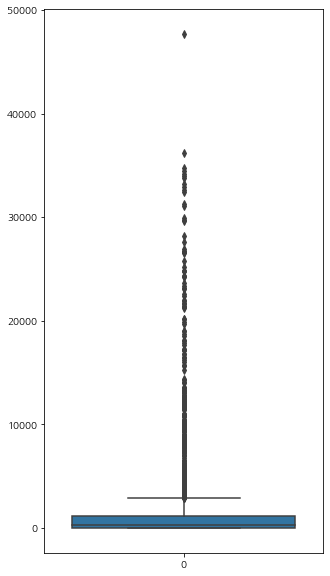

In [23]:
# boxplot으로 시각화

plt.figure(figsize=(5,10))
sns.boxplot(data=df['백만'])

- 위에서 예상한대로 상자 수염은 2000~3000 정도에서 끝남. 이상치로 의심되는 값들이 꽤 많음을 확인할 수 있음

# Q2.
**pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.**
- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.
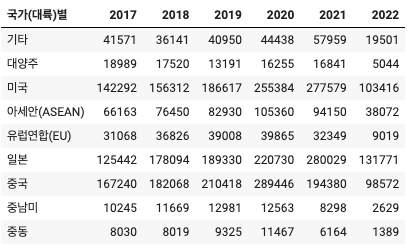

피봇테이블을 구하자.

In [48]:
pivot = df.pivot_table(index="국가(대륙)별", columns="연도", 
                      values="백만", aggfunc="sum")
pivot

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),86169,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


우선 heatmap으로 시각화 해보자

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

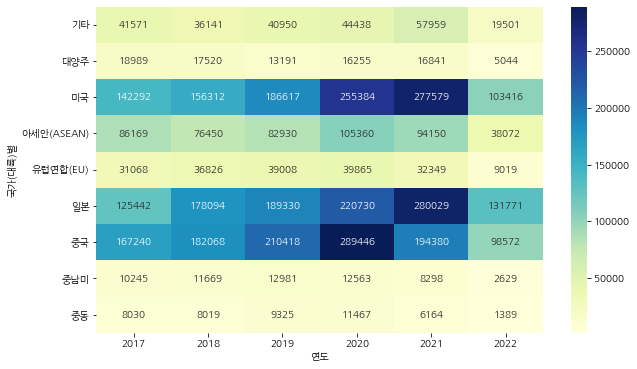

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")

- 중국, 일본, 미국의 판매량이 높을 것을 알 수 있다.  
- 2분기까지의 데이터만 존재하는 2022년 데이터를 제외하고 보면 미국, 일본은 계속해서 증가해 왔지만 중국은 최근에 감소하였다.  
  
  
다른 그래프로도 시각화해보자

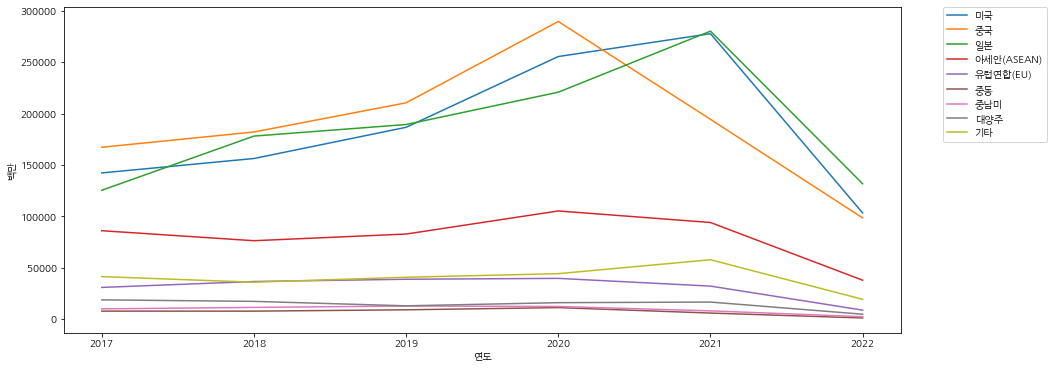

In [52]:
# lineplot으로 시각화하자
# lineplot의 estimator의 default값은 'mean' 이므로 'sum'으로 지정해 주어야 한다.

plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x="연도", y="백만", hue="국가(대륙)별", ci=None, estimator='sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- 위와 같은 내용의 증감세를 더 직관적으로 알 수 있다.

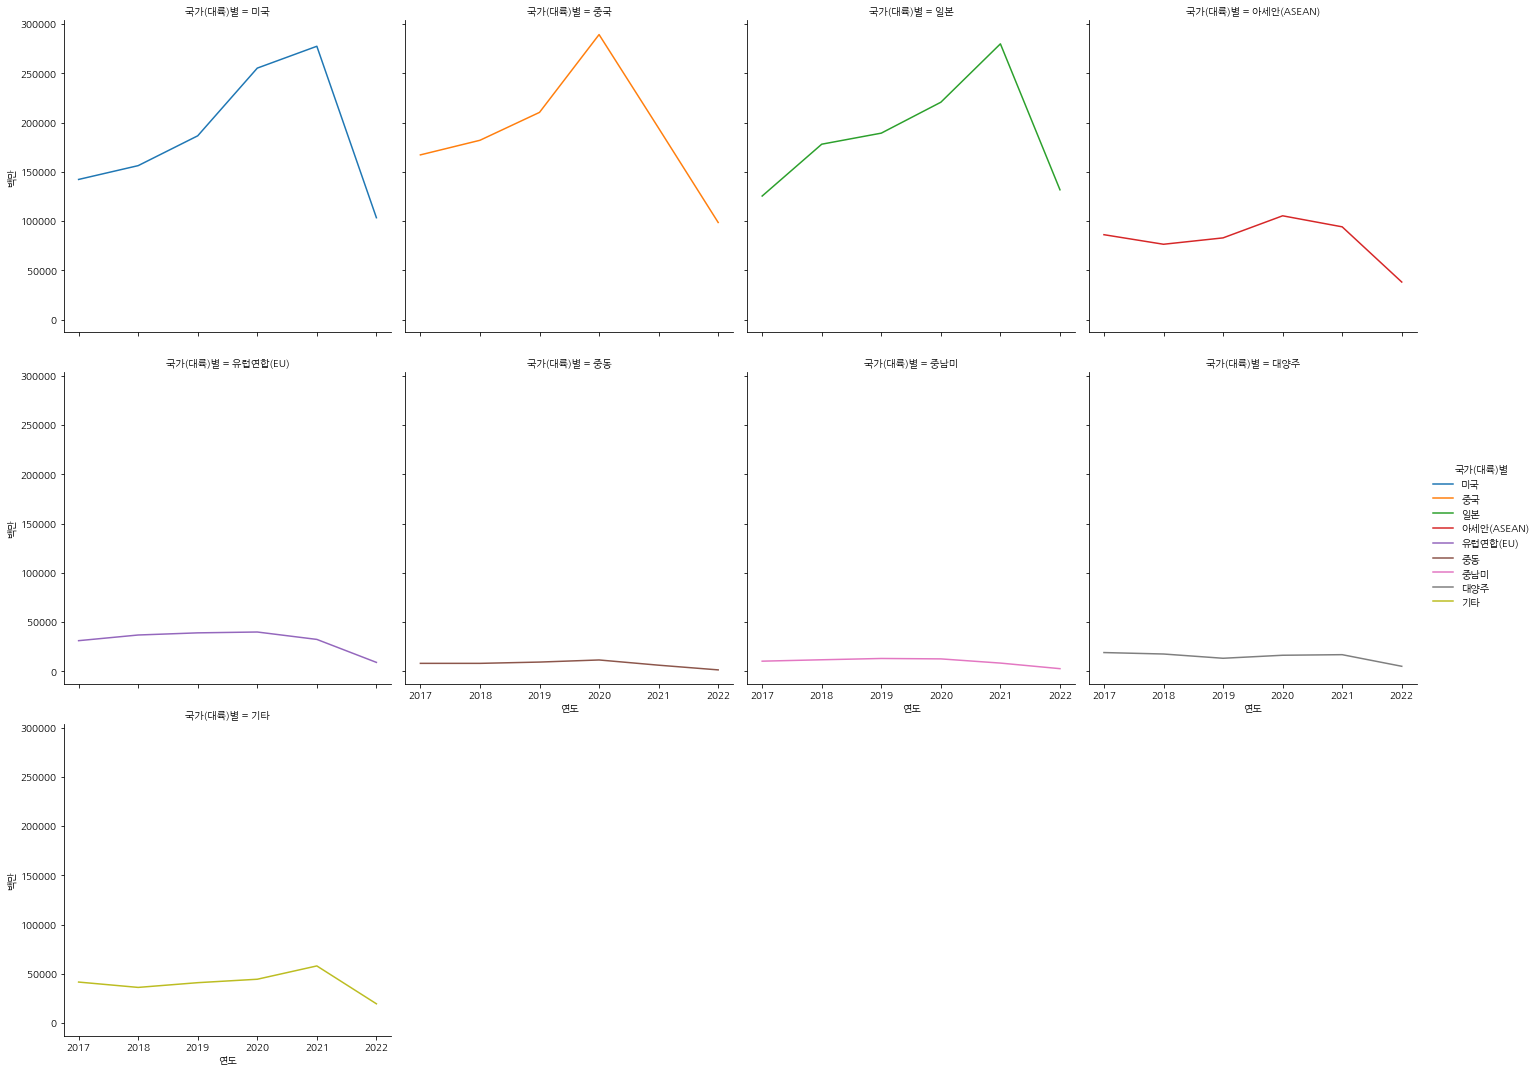

In [55]:
# 서브플롯으로 그려보자
# 마찬가지로 relplot에서도 estimator='sum' 파라미터 지정을 잊지 말자

sns.relplot(data=df, x="연도", y="백만", estimator='sum',
            hue="국가(대륙)별", kind="line", col="국가(대륙)별", col_wrap=4, ci=None)

막대그래프로 시각화 해보자

<AxesSubplot:ylabel='국가(대륙)별'>

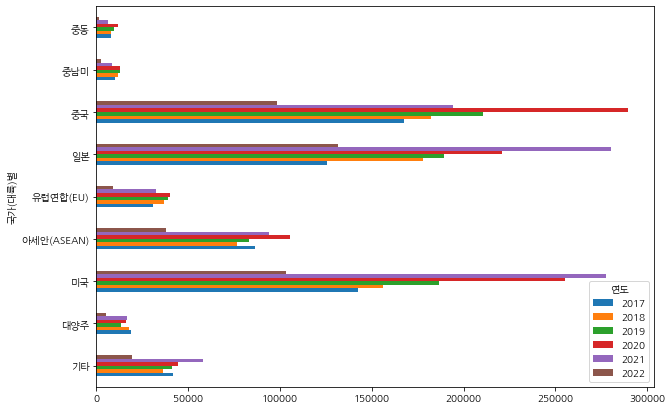

In [56]:
df_country = df.pivot_table(index = '국가(대륙)별', columns='연도', values='백만', aggfunc="sum")
df_country.plot.barh(figsize=(10,7))

- 코로나가 한창이었던 2020년 중국 판매액이 전체 기간 중 최고치를 기록했다.
- 하지만, 2021년 중국의 온라인 판매액은 전년도에 비해 감소하게 된다. 이는 코로나 초기 발생지로 알려진 중국이 바이러스에 큰 영향을 받아 2020년도에는 온라인 소비가 급증적으로 증가하게 되며 나타난 결과일 것으로 예측할 수 있다. 2021년도 중국 정부가 발표한 확진자 수는 다른 나라에 비해 현저히 낮은 수치를 기록했었다. 그로 인해서, 오프라인 활동이 늘어난 것도 영향을 끼쳤을 것으로 추측.
- 그에 반해, 일본, 미국은 2021년 온라인 판매액이 더 증가하였다. 2021년도 유행 확산이 심해지고 온라인 소비에 적응하여 이런 결과가 나왔을 것이라고 추측.

<AxesSubplot:xlabel='연도', ylabel='백만'>

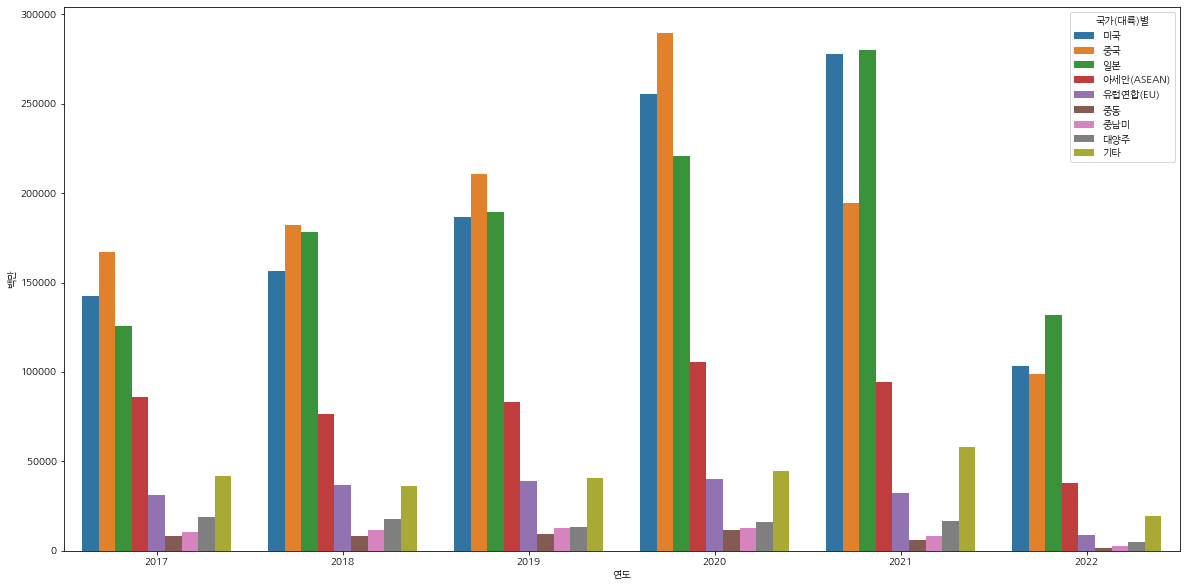

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(data = df, x = '연도', y = '백만', hue = '국가(대륙)별', ci=None, estimator = sum)

- 올해를 제외하고 전체적으로 전체적으로 온라인 해외판매량이 증가하는 추세를 확인할 수 있다.
- 2022년은 우크라-러 전쟁으로 인한 원자재 상승, 인플레이션, 중국의 코로나 봉쇄 등의 글로벌 악재가 겹치며 매우 힘든 해이므로 해외판매량이 낮을 것으로 예상된다.

# Q3.
**groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.**
- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

우선 2020년의 데이터를 추출하자.

In [59]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [60]:
df_20_index = (df["연도"] == 2020)
df_20 = df[df_20_index].copy()
df_20

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
12,미국,컴퓨터 및 주변기기,면세점 이외,2020.1/4,1182,2020,1
13,미국,컴퓨터 및 주변기기,면세점 이외,2020.2/4,1631,2020,2
14,미국,컴퓨터 및 주변기기,면세점 이외,2020.3/4,1871,2020,3
15,미국,컴퓨터 및 주변기기,면세점 이외,2020.4/4,1373,2020,4
34,미국,가전·전자·통신기기,면세점 이외,2020.1/4,1818,2020,1
...,...,...,...,...,...,...,...
2743,기타,생활용품 및 자동차용품,면세점 이외,2020.4/4,392,2020,4
2762,기타,기 타,면세점 이외,2020.1/4,939,2020,1
2763,기타,기 타,면세점 이외,2020.2/4,710,2020,2
2764,기타,기 타,면세점 이외,2020.3/4,826,2020,3


문제를 해결하기 위해서는 unstack() 메서드를 사용하여 '상품군별' 컬럼의 항목들을 컬럼들로 설정해야 한다.

In [61]:
unstack = df_20.unstack(1)
pd.DataFrame(unstack)

0
국가(대륙)별 12    미국
        13    미국
        14    미국
        15    미국
        34    미국
...           ..
분기      2743   4
        2762   1
        2763   2
        2764   3
        2765   4

[3528 rows x 1 columns]

시도해 보았지만 원하는 결과가 나오지 않는다..  
알아보니 unstack()메서드는 multiIndex가 있는 경우만 해당 인덱스를 컬럼으로 올려주는 방법으로 작동하는 것이라고 한다.  
하지만 df_20의 "국가(대륙)별"컬럼은 인덱스가 아니다.  
  
  
따라서 먼저 groupby로 "국가(대륙)별"컬럼이 Index가 되게 만들고 unstack()메서드를 사용하자.

In [62]:
# groupby를 이용하여 상품군별 지역별 합계 데이터를 구하자.
group_series = df_20.groupby(["상품군별", "국가(대륙)별"])["백만"].agg("sum")
group = pd.DataFrame(group_series)
group

백만
상품군별       국가(대륙)별          
가전·전자·통신기기 기타           1716
           대양주          3825
           미국          10103
           아세안(ASEAN)  12405
           유럽연합(EU)     3040
...                      ...
화장품        유럽연합(EU)     7524
           일본          42215
           중국          38855
           중남미           954
           중동           2217

[126 rows x 1 columns]

In [63]:
# unstack() 메서드를 사용하자.
result = group.unstack()
result

백만                                                         \
국가(대륙)별          기타   대양주     미국 아세안(ASEAN) 유럽연합(EU)      일본      중국   중남미   
상품군별                                                                         
가전·전자·통신기기     1716  3825  10103      12405     3040     404    1353   912   
기 타            3345   923  38731       2620     3907   30509   22736   625   
농축수산물             9     1     33         17        0       2      88     0   
사무·문구           187    21    398       3279       25    1526     403     3   
생활용품 및 자동차용품   1464  1198  11467       6432     2560    3911    7142  1361   
서 적            4563   367   9709       4192      514    1055    6659   188   
소프트웨어            21    20    865          3       99      27       4    15   
스포츠·레저용품        755   690   5862       7423     1297     646    3999   183   
아동·유아용품        1646   484   4934       2698     1354    1353    5606   151   
음·식료품          1596   403   2706       4291      423    4699    4220   774   
음반·비디오·악기      1410  1800  32919      16135    12092   14738  125078  6421   
의류 및 패션 관련상품   6501  3746  82154      37992     5120  119452   73068   614   
컴퓨터 및 주변기기     5653   318   6057        541     1910     193     235   362   
화장품           15572  2459  49446       7332     7524   42215   38855   954   

                    
국가(대륙)별         중동  
상품군별                
가전·전자·통신기기     839  
기 타            533  
농축수산물            0  
사무·문구            4  
생활용품 및 자동차용품  1060  
서 적            139  
소프트웨어           17  
스포츠·레저용품       196  
아동·유아용품        121  
음·식료품          927  
음반·비디오·악기     3250  
의류 및 패션 관련상품  1776  
컴퓨터 및 주변기기     388  
화장품           2217

**pivot_table은 columns 파라미터로 column을 지정 할 수 있지만 groupby는 unstack 기능으로 지정할 수 있다.**

이제 시각화 해보자

In [64]:
# 우선 heatmap으로 해보자

<AxesSubplot:xlabel='None-국가(대륙)별', ylabel='상품군별'>

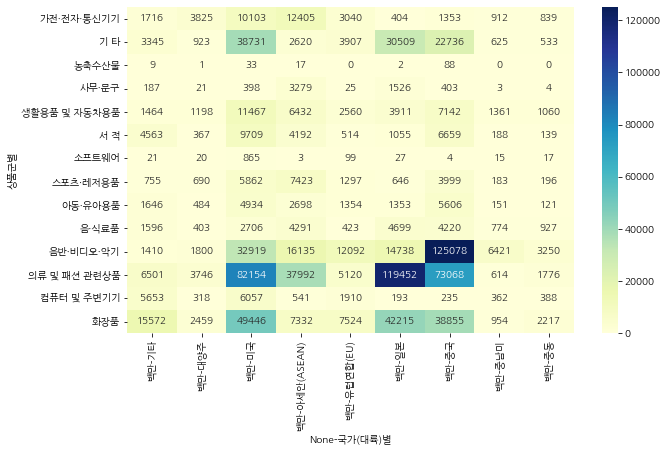

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".0f")

- 2020 코로나 시기에도 여전히 미국, 일본, 중국으로의 수출액이 상대적으로 높은 것을 알 수 있다.
- 다만 상품군별로 차이가 나는 것은 코로나 시기 이전과의 비교가 없어 분석이 어렵다.
- 코로나 이전인 2019년 데이터를 시각화해보자

<AxesSubplot:xlabel='None-국가(대륙)별', ylabel='상품군별'>

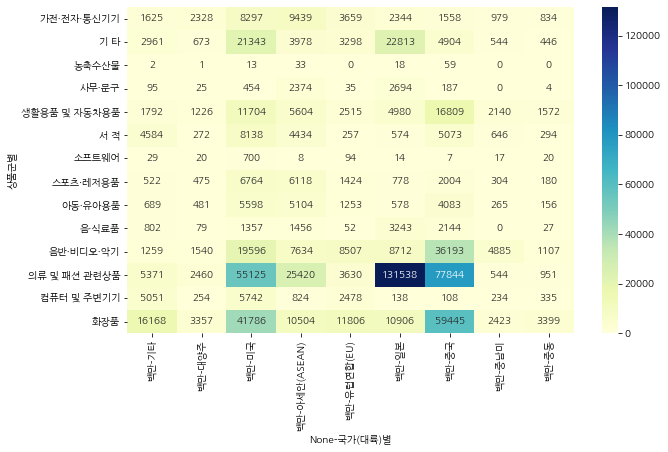

In [66]:
df_19_index = (df["연도"] == 2019)
df_19 = df[df_19_index].copy()

group19_series = df_19.groupby(["상품군별", "국가(대륙)별"])["백만"].agg("sum")
group19 = pd.DataFrame(group19_series)

result19 = group19.unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(result19, cmap="YlGnBu", annot=True, fmt=".0f")

<AxesSubplot:xlabel='None-국가(대륙)별', ylabel='상품군별'>

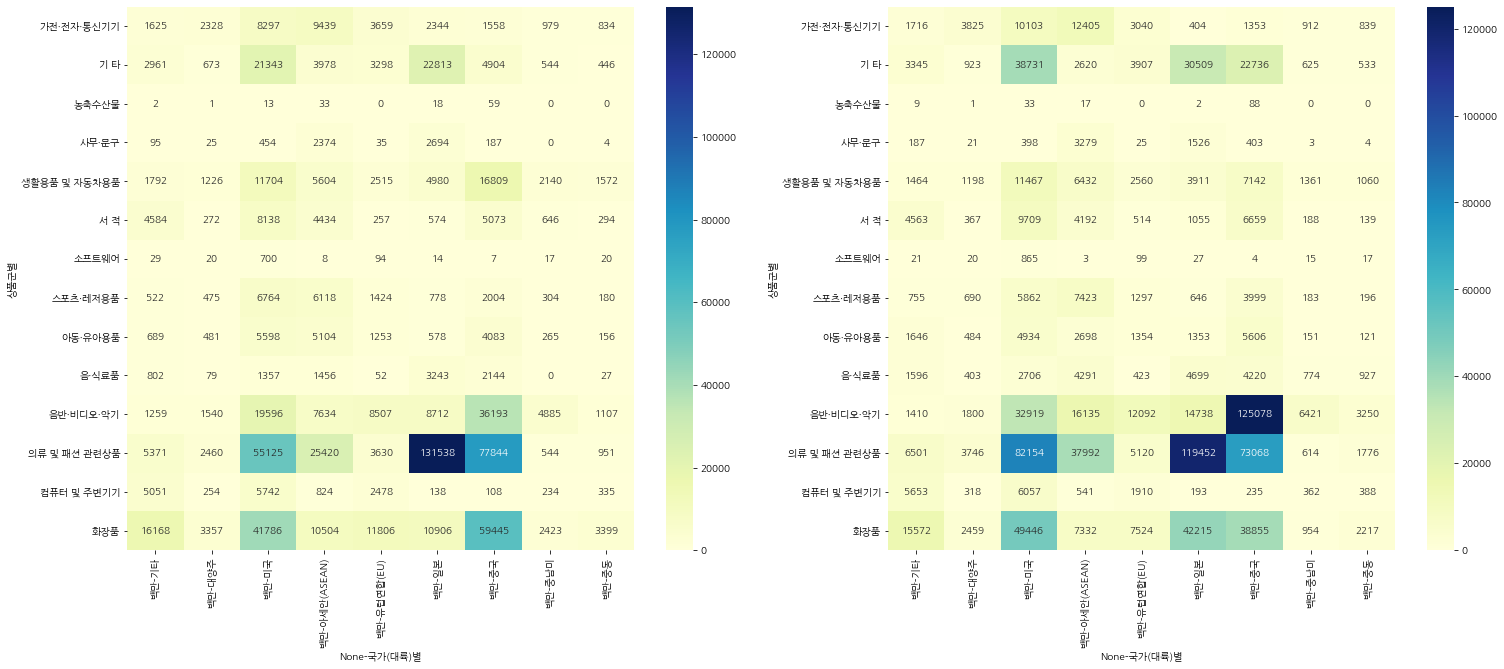

In [67]:
# 한 눈에 보기 쉽게 히트맵을 두 개 그려보자

# subplots 메서드 사용법
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

fig, ax = plt.subplots(ncols=2, figsize=(25, 10))
# 2019년과 2020 데이터
sns.heatmap(result19, cmap="YlGnBu", annot=True, fmt=".0f", ax=ax[0])
sns.heatmap(result, cmap="YlGnBu", annot=True, fmt=".0f", ax=ax[1])

- '음반, 비디오, 악기'가 확실히 증가하였음을 알 수 있다.
- 아마 코로나의 영향으로 집에있는 시간이 증가하면서 혼자 즐길 수 있는 음악 관련 상품들의 수출이 증가한 것 같다.

### 다른 의견 1.

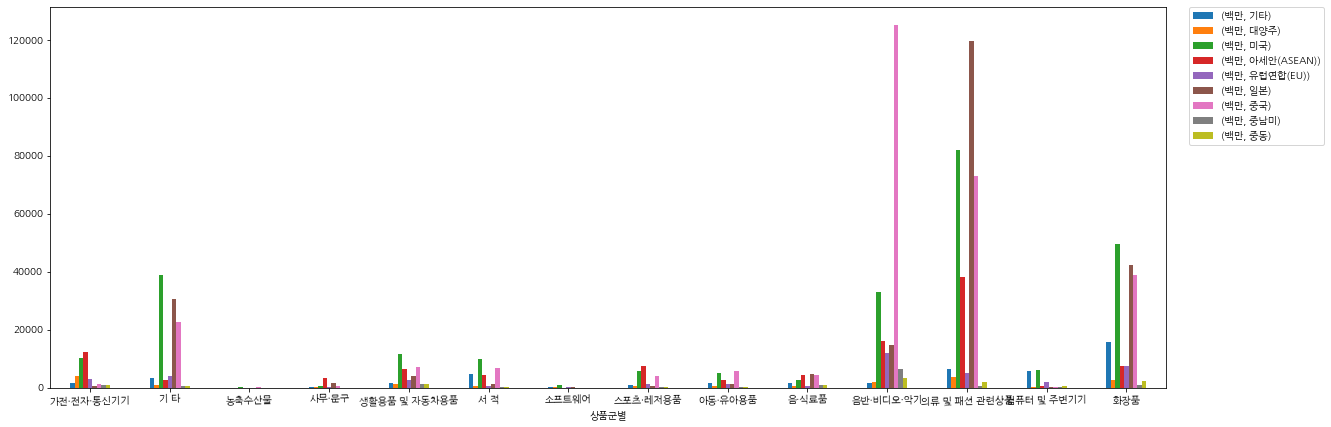

In [69]:
result.plot.bar(rot=1, figsize=(20,7))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.) # 그래프 밖에 주석 표시하기

- 2020년도 중국에서는 음반 비디오 악기가 제일 높은 판매량을 기록했다. 코로나로 인한 격리 생활 중에 K-POP으로 위로를 얻었던 것일까...?
- 일본, 미국에서는 의류 및 패션 관련상품이 제일 판매량이 많았다.
- 전체적으로, 예상하지 못한 결과가 나왔다. 우선, 대부분의 국가(대륙)에서 가전 전자 통신기기의 비중이 제일 높을 것이라고 예상했지만 전혀 아니었다. 오히려, 코로나로 인해 큰 반시이익을 얻지 못할 것이라고 생각했던 음반 비디오 악기, 의류 및 패션 관련상품의 판매액이 제일 높게 위치했다. 이것이 의미하는 바가 무엇일지는 기사나 다른 데이터들을 통해서 파악하면 좋을 것 같다.

### 다른의견 2.

In [71]:
df_20.groupby(['상품군별', '국가(대륙)별']).agg(sum).sort_values(by='백만', ascending=False)

백만    연도  분기
상품군별         국가(대륙)별                   
음반·비디오·악기    중국        125078  8080  10
의류 및 패션 관련상품 일본        119452  8080  10
             미국         82154  8080  10
             중국         73068  8080  10
화장품          미국         49446  8080  10
...                       ...   ...  ..
농축수산물        일본             2  8080  10
             대양주            1  8080  10
             유럽연합(EU)       0  8080  10
             중동             0  8080  10
             중남미            0  8080  10

[126 rows x 3 columns]

In [73]:
df_19.groupby(['상품군별', '국가(대륙)별']).agg(sum).sort_values(by='백만', ascending=False).head(10)

백만    연도  분기
상품군별         국가(대륙)별                     
의류 및 패션 관련상품 일본          131538  8076  10
             중국           77844  8076  10
화장품          중국           59445  8076  10
의류 및 패션 관련상품 미국           55125  8076  10
화장품          미국           41786  8076  10
음반·비디오·악기    중국           36193  8076  10
의류 및 패션 관련상품 아세안(ASEAN)   25420  8076  10
기 타          일본           22813  8076  10
             미국           21343  8076  10
음반·비디오·악기    미국           19596  8076  10

- 2019, 2020년의 온라인 해외판매량 상위 10개 그룹만 가져왔다. 
- 2019년엔 미/중/일/아세안 향 패션상품, 화장품 등이 인기를 끌었다. 
- 2020년엔 음반, 비디오, 악기 상품이 인기를 끌었던 것을 확인할 수 있다. 
- 반면 화장품 상품에선 약간의 둔화를 보였다. 
- 2020년은 K-drama, K-pop의 호황이 있었던 시기로 판단할 수 있다.

# Q4.
**주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.**
- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
- 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

**가설**
- 위에서 확인할 수 있듯이 "음반·비디오·악기"는 2020년에 가파르게 증가하였다. 코로나가 어느정도 주춤해진 2021년에는 증가세가 줄어들었을 것이다.  
  
  
- 반대로 "화장품"과 "의류 및 패션 관련상품"은 바깥활동에 필요한 상품들이다. 코로나가 심하던 2020년에는 감소하였을 것으로 예상한다. 2021년에는 증가했을 것이다.  
  
  
- 국가별로는 예상하기 어렵다.

In [75]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


2022년 데이터를 삭제하자

In [76]:
del_index = df[df["연도"] == 2022].index
del_index

Int64Index([  20,   21,   42,   43,   64,   65,   86,   87,  108,  109,
            ...
            2682, 2683, 2704, 2705, 2726, 2727, 2748, 2749, 2770, 2771],
           dtype='int64', length=252)

In [77]:
df2 = df.drop(index=del_index, axis=0)
df2["연도"].value_counts()

2017    504
2018    504
2019    504
2020    504
2021    504
Name: 연도, dtype: int64

"의류 및 패션 관련상품", "화장품", "음반·비디오·악기"를 제외한 데이터를 삭제하자.

In [78]:
df3 = df2[(df2["상품군별"] == "의류 및 패션 관련상품") | 
          (df2["상품군별"] == "화장품") | 
          (df2["상품군별"] == "음반·비디오·악기")].copy()
df3

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
2655,기타,화장품,면세점 이외,2020.4/4,1467,2020,4
2656,기타,화장품,면세점 이외,2021.1/4,1339,2021,1
2657,기타,화장품,면세점 이외,2021.2/4,1361,2021,2
2658,기타,화장품,면세점 이외,2021.3/4,1161,2021,3


미국, 일본, 중국 데이터만 남기자

In [79]:
df4 = df3[(df3["국가(대륙)별"] == "미국") | 
          (df3["국가(대륙)별"] == "중국") | 
          (df3["국가(대륙)별"] == "일본")].copy()
df4

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


relplot을 사용하여 시각화하자

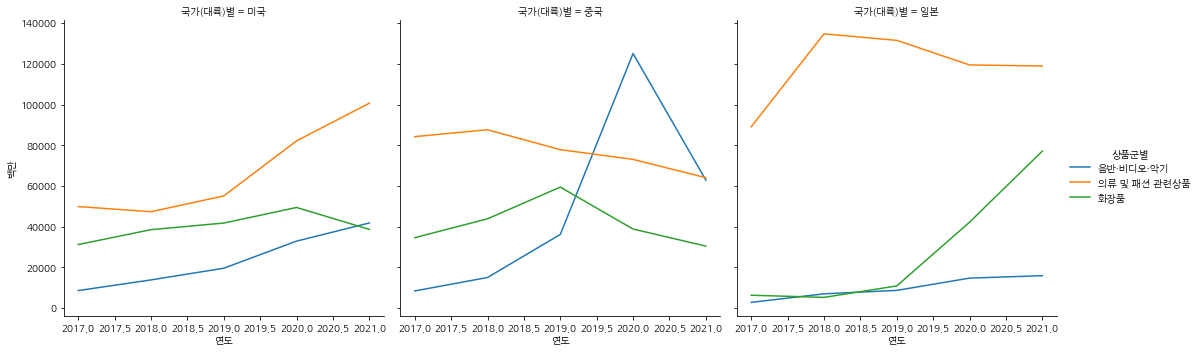

In [80]:
# lineplot의 estimator의 default값은 'mean' 이므로 'sum'으로 지정해 주어야 한다.

sns.relplot(data=df4, x="연도", y="백만", kind="line",
           hue="상품군별", col="국가(대륙)별", col_wrap=3, ci=None, estimator='sum')

x축 연도가 .0, .5 등으로 보기 불편하다.  
위에서 연도 column을 int형으로 바꿔서 그런 듯 하니 str타입으로 다시 바꿔주자.

In [81]:
df4['연도'] = df4['연도'].astype('str')            #str타입으로 다시 바꿔줌
df4['연도']

110    2017
111    2017
112    2017
113    2017
114    2018
       ... 
807    2020
808    2021
809    2021
810    2021
811    2021
Name: 연도, Length: 180, dtype: object

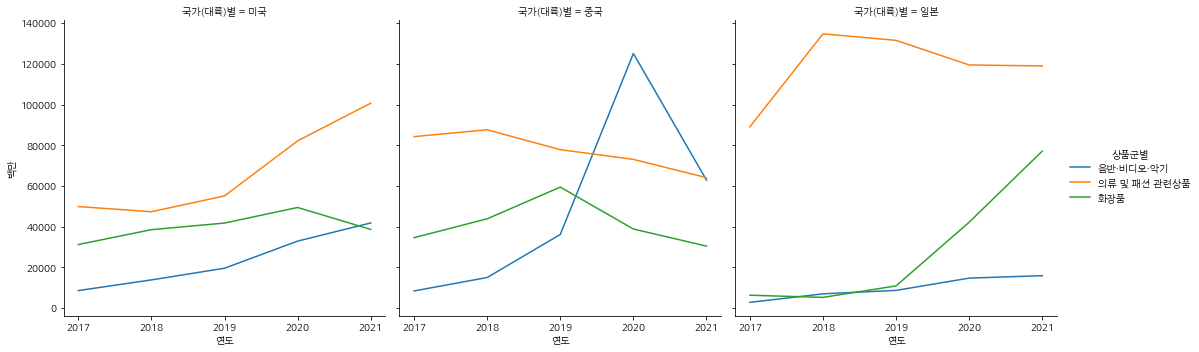

In [82]:
sns.relplot(data=df4, x="연도", y="백만", kind="line",
           hue="상품군별", col="국가(대륙)별", col_wrap=3, ci=None, estimator='sum')

**결과**  
- 예상과는 달리 "음반·비디오·악기"는 2020년 초부터 증가세가 주춤하였다. 중국에서는 심지어 감소하였다.
- "의류 및 패선 관련상품"은 미국에서 증가하였다. 중국과 일본에서는 최근들어 계속 감소세다.
- "화장품"의 경우 미국, 중국에서는 최근에 약간 감소하였지만 일본에서는 급격히 증가하였다.
  
  
- 처음 예상과 달리 코로나로 인한 가설은 맞지 않는 것 같다.
  
  
- 전반적으로 중국은 판매가 감소세이고 미국, 일본은 증가세 임을 알 수 있다.

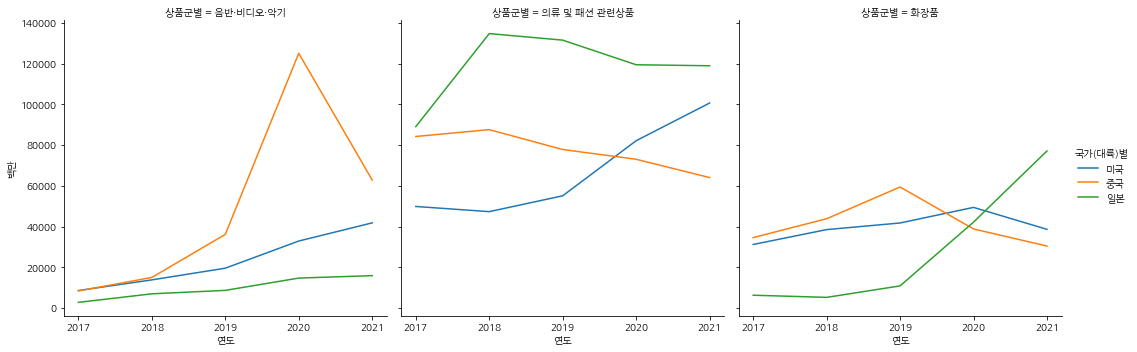

In [83]:
sns.relplot(data=df4, x='연도', y='백만', hue='국가(대륙)별', col='상품군별', kind='line',  estimator=sum, ci=None)


- K-pop, K-drama, K-fashion, K-beauty 모두 관련 상품들의 판매액의 증가에 지대한 영향을 미친 것으로 보인다.
- 그러나 최근엔 세계적 경기불황으로 감소할 것으로 전망된다.